# DEMARCHE DE TRAVAIL

## PARTIE 1: DEFINIR UN OBJECTIF MESURABLE

### 1. Objectif du projet
Trouver le prix des laptops en fonction de leurs caracteristiques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time

import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_row",100) # afficher 100 lignes
pd.set_option("display.max_columns",100) # afficher 100 colonnes

In [2]:
data = pd.read_csv("laptop_price.csv", encoding="latin-1")

## PARTIE 2: EDA (EXPLORATORY DATA ANALYSIS) EXPLORATION DES DONNEES

### 1. Checklist de base (non-exhaustive)

#### 1.1. Analyse de la forme :

In [3]:
df = data.copy()
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.shape

(1303, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


##### Visualisation de la target 

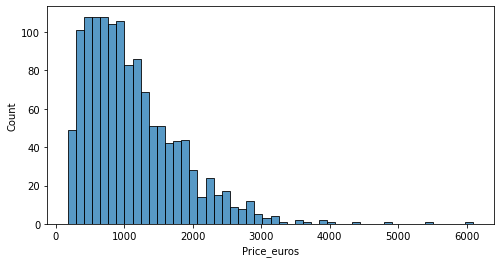

In [6]:
plt.figure(figsize=(8,4))
sns.histplot(df["Price_euros"], bins=50);

In [7]:
print(f"Prix <= 1000€: {len(df[df['Price_euros'] <= 1000])}")
print(f"Prix > 1000€ & <= 1500€: {len(df[(df['Price_euros']>1000) & (df['Price_euros']<=1500)])}")
print(f"Prix > 1500€ & <= 2000€: {len(df[(df['Price_euros']>1500) & (df['Price_euros']<=2000)])}")
print(f"Prix > 2000€ & <= 3000€: {len(df[(df['Price_euros']>2000) & (df['Price_euros']<=3000)])}")
print(f"Prix > 3000€ & <= 4000€: {len(df[(df['Price_euros']>3000) & (df['Price_euros']<40500)])}")
print(f"Prix > 4000€ {len(df[df['Price_euros'] > 4000])}")

Prix <= 1000€: 683
Prix > 1000€ & <= 1500€: 316
Prix > 1500€ & <= 2000€: 167
Prix > 2000€ & <= 3000€: 118
Prix > 3000€ & <= 4000€: 19
Prix > 4000€ 4


In [8]:
print (f"Prix minimum: {df['Price_euros'].min()}")
print (f"Prix maximum: {df['Price_euros'].max()}")

Prix minimum: 174.0
Prix maximum: 6099.0


In [9]:
print (f"Prix moyen: {df['Price_euros'].mean()}")
print (f"Prix median: {df['Price_euros'].median()}")
print (f"Prix quantile: {np.quantile(df['Price_euros'],q=[0.25,0.75])}")

Prix moyen: 1123.6869915579432
Prix median: 977.0
Prix quantile: [ 599.   1487.88]


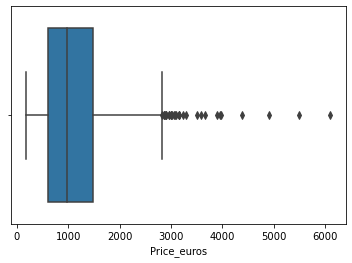

In [10]:
sns.boxplot(df['Price_euros']);

##### Compréhension des différentes variables

In [11]:
col_features = df.drop("Price_euros",axis=1).columns

In [12]:
print("NOMBRE DE VALEURS UNIQUES POUR CHAQUE VARIABLE")
for col in df[col_features]:
    print(f"{col}: {df[col].nunique()}")

NOMBRE DE VALEURS UNIQUES POUR CHAQUE VARIABLE
laptop_ID: 1303
Company: 19
Product: 618
TypeName: 6
Inches: 18
ScreenResolution: 40
Cpu: 118
Ram: 9
Memory: 39
Gpu: 110
OpSys: 9
Weight: 179


###### Company

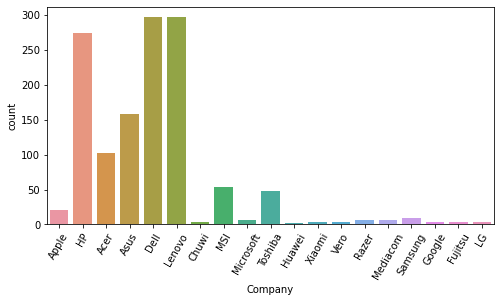

In [13]:
plt.figure(figsize=(8,4))
sns.countplot(df["Company"]);
plt.xticks(rotation = 60);

In [14]:
for c in df['Company'].unique():
    print(f"{c:-<20}: {len(df[df['Company'] == c])}")

Apple---------------: 21
HP------------------: 274
Acer----------------: 103
Asus----------------: 158
Dell----------------: 297
Lenovo--------------: 297
Chuwi---------------: 3
MSI-----------------: 54
Microsoft-----------: 6
Toshiba-------------: 48
Huawei--------------: 2
Xiaomi--------------: 4
Vero----------------: 4
Razer---------------: 7
Mediacom------------: 7
Samsung-------------: 9
Google--------------: 3
Fujitsu-------------: 3
LG------------------: 3


###### Cpu

In [15]:
print(f"i3:{len(df[df['Cpu'].str.contains('i3')])}")
print(f"i5: {len(df[df['Cpu'].str.contains('i5')])}")
print(f"i7: {len(df[df['Cpu'].str.contains('i7')])}")
print(f"AMD: {len(df[df['Cpu'].str.contains('AMD')])}")
print(f"Other: {len(df[(df['Cpu'].str.contains('i3') == False) & (df['Cpu'].str.contains('i5') == False) & (df['Cpu'].str.contains('i7') == False) & (df['Cpu'].str.contains('AMD') == False)])}")

i3:136
i5: 423
i7: 527
AMD: 62
Other: 155


###### Memory

In [16]:
print(f"HDD : {len(df[(df['Memory'].str.contains('HDD') == True) & (df['Memory'].str.contains('SSD') ==False)])}")
print(f"SSD: {len(df[(df['Memory'].str.contains('HDD') == False) & (df['Memory'].str.contains('SSD') == True)])}")
print(f"HDD & SSD:{len(df[(df['Memory'].str.contains('HDD') == True) & (df['Memory'].str.contains('SSD') == True)])}")
print(f"Flash: {len(df[df['Memory'].str.contains('Flash')])}")
print(f"Hybrid: {len(df[df['Memory'].str.contains('Hybrid')])}")


HDD : 376
SSD: 643
HDD & SSD:200
Flash: 75
Hybrid: 12


###### Gpu

In [17]:
print(f"AMD: {len(df[df['Gpu'].str.contains('AMD')])}")
print(f"Nvidia: {len(df[df['Gpu'].str.contains('Nvidia')])}")
print(f"Intel: {len(df[df['Gpu'].str.contains('Intel')])}")
print(f"Other: {len(df[(df['Gpu'].str.contains('AMD') == False) & (df['Gpu'].str.contains('Nvidia') == False) & (df['Gpu'].str.contains('Intel') == False)])}")

AMD: 180
Nvidia: 400
Intel: 722
Other: 1


###### OpSys



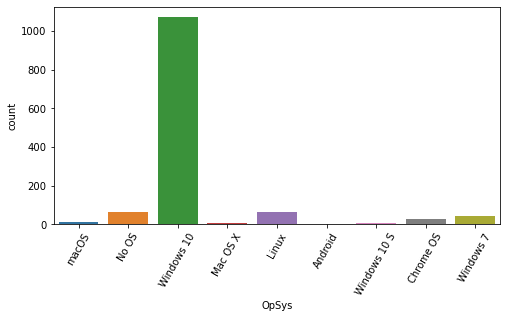

In [18]:
plt.figure(figsize=(8,4))
sns.countplot(df["OpSys"]);
plt.xticks(rotation = 60);

##### Identification des Outliers

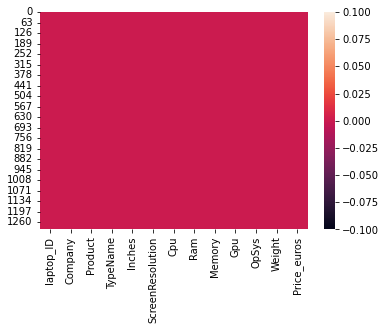

In [19]:
sns.heatmap(df.isna());

## PARTIE 3: PREPROCESSING (PRE-TRAITEMENT DES DONNEES)

### Encodage

###### Cpu

In [20]:
for x in df['Cpu']:
    if x.__contains__('AMD'):
        df['Cpu'].replace(x, 'AMD', inplace=True)
    elif x.__contains__('i3'):
        df['Cpu'].replace(x, 'i3', inplace=True)
    elif x.__contains__('i5'):
        df['Cpu'].replace(x, 'i5', inplace=True)
    elif x.__contains__('i7'):
        df['Cpu'].replace(x, 'i7', inplace=True)
    else:
        df['Cpu'].replace(x, 'other', inplace=True)

# df["Cpu"] = df["Cpu"].apply(lambda x: 'AMD' if "AMD" in x else x)
# df["Cpu"] = df["Cpu"].apply(lambda x: 'i3' if "i3" in x else x)
# df["Cpu"] = df["Cpu"].apply(lambda x: 'i5' if "i5" in x else x)
# df["Cpu"] = df["Cpu"].apply(lambda x: 'i7' if "i7" in x else x)

###### Gpu

In [21]:
for x in df['Gpu']:
    if x.__contains__('AMD'):
        df['Gpu'].replace(x, 'AMD', inplace=True)
    elif x.__contains__('Nvidia'):
        df['Gpu'].replace(x, 'Nvidia', inplace=True)
    elif x.__contains__('Intel'):
        df['Gpu'].replace(x, 'Intel', inplace=True)
    else:
        df['Gpu'].replace(x, 'other', inplace=True)

###### Ram

In [22]:
df["Ram"] = df["Ram"].str.replace('GB', '')

In [23]:
df["Ram"] = df["Ram"].astype(int)

###### Weight

In [24]:
df["Weight"] = df["Weight"].str.replace('kg', '')

In [25]:
df["Weight"] = df["Weight"].astype(float)

In [26]:
df[['First','Last']] = df['Memory'].str.split("+",expand=True)

In [27]:
df['First'] = df['First'].str.replace("GB", '')
df['First'] = df['First'].str.replace(".0TB", '000')
df['First'] = df['First'].str.replace("TB", '000')

In [28]:
df.First.unique()

array(['128 SSD', '128 Flash Storage', '256 SSD', '512 SSD', '500 HDD',
       '256 Flash Storage', '1000 HDD', '32 Flash Storage', '128 SSD ',
       '256 SSD ', '64 Flash Storage', '32 SSD', '2000 HDD', '64 SSD',
       '1000 Hybrid', '512 SSD ', '1000 SSD', '16 SSD',
       '16 Flash Storage', '64 Flash Storage ', '180 SSD', '1000 HDD ',
       '32 HDD', '1000 SSD ', '512 Flash Storage', '128 HDD', '240 SSD',
       '8 SSD', '508 Hybrid'], dtype=object)

In [29]:
df.First = df.First.str.split()

In [30]:
for x in df.First:
    if len(x) == 3:
        x.pop(2)
        

In [31]:
first_list = []
for x in df.First:
    if x[1] not in first_list:
        first_list.append(x[1])

In [32]:
for x in first_list:
    df[x] = pd.Series()
    for i, y in enumerate(df.First):
        if y[1] == x:
            df[x][i] = y[0]
        else:
            df[x][i] = 0
            
df[['SSD', 'HDD','Flash', 'Hybrid']] = df[['SSD', 'HDD','Flash', 'Hybrid']].astype('int')

In [33]:

df['Last'] = df['Last'].str.replace("GB", '')
df['Last'] = df['Last'].str.replace(".0TB", '000')
df['Last'] = df['Last'].str.replace("TB", '000')

In [34]:
df.Last = df.Last.str.split()

In [35]:
last_list = []
for x in df.First:
    if x[1] not in last_list:
        last_list.append(x[1])

In [36]:
for x in last_list:
    for i, y in enumerate(df.Last):
        if y == None:
            continue
        if y[1] == x:
            df[x][i] = df[x][i] + int(y[0])
        else:
            df[x][i] = df[x][i]

In [37]:
df.drop(['First', 'Last'], axis=1, inplace=True)

In [38]:
res = df["ScreenResolution"].str.split("x", n = 1, expand = True) 

In [39]:
df['width_res'] = res[0].str.split(' ')

In [40]:
for i, x in enumerate(df.width_res):
    df['width_res'][i] = x[-1]

In [41]:
df['height_res'] = res[1]

In [42]:
df[['width_res', 'height_res']] = df[['width_res', 'height_res']].astype(int)

In [43]:
df['PPI'] = ((np.sqrt(df.width_res**2 + df.width_res**2))/df.Inches).astype(int)

In [44]:
df.drop(['Product','ScreenResolution','Inches','Memory','width_res', 'height_res','laptop_ID'],axis=1, inplace=True)

In [45]:
df.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,SSD,Flash,HDD,Hybrid,PPI
0,Apple,Ultrabook,i5,8,Intel,macOS,1.37,1339.69,128,0,0,0,272
1,Apple,Ultrabook,i5,8,Intel,macOS,1.34,898.94,0,128,0,0,153
2,HP,Notebook,i5,8,Intel,No OS,1.86,575.00,256,0,0,0,174
3,Apple,Ultrabook,i7,16,AMD,macOS,1.83,2537.45,512,0,0,0,264
4,Apple,Ultrabook,i5,8,Intel,macOS,1.37,1803.60,256,0,0,0,272


In [46]:
df = df.reindex(columns=['Company',
                         'TypeName',
                         'Cpu',
                         'Ram',
                         'Gpu',
                         'OpSys',
                         'Weight',
                         'SSD',
                         'Flash',
                         'HDD',
                         'Hybrid',
                         'PPI',
                         'Price_euros',])

In [47]:
df.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,SSD,Flash,HDD,Hybrid,PPI,Price_euros
0,Apple,Ultrabook,i5,8,Intel,macOS,1.37,128,0,0,0,272,1339.69
1,Apple,Ultrabook,i5,8,Intel,macOS,1.34,0,128,0,0,153,898.94
2,HP,Notebook,i5,8,Intel,No OS,1.86,256,0,0,0,174,575.00
3,Apple,Ultrabook,i7,16,AMD,macOS,1.83,512,0,0,0,264,2537.45
4,Apple,Ultrabook,i5,8,Intel,macOS,1.37,256,0,0,0,272,1803.60


In [48]:
print("NOMBRE DE VALEURS UNIQUES POUR CHAQUE VARIABLE")
for col in df:
    print(f"{col}: {df[col].nunique()}")

NOMBRE DE VALEURS UNIQUES POUR CHAQUE VARIABLE
Company: 19
TypeName: 6
Cpu: 5
Ram: 9
Gpu: 4
OpSys: 9
Weight: 171
SSD: 13
Flash: 7
HDD: 6
Hybrid: 3
PPI: 35
Price_euros: 791


In [49]:
X = df.drop("Price_euros", axis=1)
y = df['Price_euros']

In [50]:
X_categorical = X.select_dtypes(object)

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
encoder = OneHotEncoder(sparse=False)
X_ohe = encoder.fit_transform(X_categorical)
X_cat_col = X_categorical.columns

In [53]:
X_ohe = pd.DataFrame(X_ohe, columns=encoder.get_feature_names_out())

In [54]:
X_ohe

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Cpu_AMD,Cpu_i3,Cpu_i5,Cpu_i7,Cpu_other,Gpu_AMD,Gpu_Intel,Gpu_Nvidia,Gpu_other,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [55]:
X_categorical = pd.get_dummies(X_categorical)
X_categorical

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Cpu_AMD,Cpu_i3,Cpu_i5,Cpu_i7,Cpu_other,Gpu_AMD,Gpu_Intel,Gpu_Nvidia,Gpu_other,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1299,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1300,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
1301,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [56]:
X.drop(X.select_dtypes(object), axis=1, inplace=True)
X = pd.concat([X_categorical,X], axis=1)
X

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Cpu_AMD,Cpu_i3,Cpu_i5,Cpu_i7,Cpu_other,Gpu_AMD,Gpu_Intel,Gpu_Nvidia,Gpu_other,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,Ram,Weight,SSD,Flash,HDD,Hybrid,PPI
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,8,1.37,128,0,0,0,272
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,8,1.34,0,128,0,0,153
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,8,1.86,256,0,0,0,174
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,16,1.83,512,0,0,0,264
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,8,1.37,256,0,0,0,272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,4,1.80,128,0,0,0,193
1299,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,16,1.30,512,0,0,0,340
1300,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,2,1.50,0,64,0,0,137
1301,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,6,2.19,0,0,1000,0,123


## PARTIE 4: MODELING (MODELISATION)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.preprocessing import RobustScaler

from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import learning_curve

import time

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [59]:
preprocessor = make_pipeline(SelectKBest(f_regression, k = 5))

In [60]:
RandomForest = make_pipeline(preprocessor, RandomForestRegressor(random_state=0))
LinearRegression = make_pipeline(preprocessor,RobustScaler(), LinearRegression())
KNN = make_pipeline(preprocessor, RobustScaler(), KNeighborsRegressor())
SVR = make_pipeline(preprocessor, RobustScaler(), SVR())



dict_of_models = {'RandomForest': RandomForest,
                  'LinearRegresion' : LinearRegression,
                  'KNN': KNN,
                  'SVR': SVR
                 }

In [61]:
def evaluation(model, name):
    start = time.time()
    
    print(f"*****{name}*****\n")
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
        
    # Calculer les courbes d'apprentissage
    train_sizes, train_scores, val_scores = learning_curve(model, X = X_train, y = y_train, train_sizes= np.linspace(0.1,1,10), cv=5)

    # Calculer les moyennes et les écarts-types pour les scores d'entraînement et de validation
    train_scores_mean = train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    val_scores_mean = val_scores.mean(axis=1)
    val_scores_std = val_scores.std(axis=1)

    # Tracer les courbes d'apprentissage
    plt.figure()
    plt.title(f"Courbes d'apprentissage - {name}")
    plt.xlabel("Taille de l'ensemble d'entraînement")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(x = train_sizes, 
                     y1 = train_scores_mean - train_scores_std,
                     y2 = train_scores_mean + train_scores_std,
                     alpha = 0.1,
                     color = "r")
    
    plt.fill_between(x = train_sizes,
                     y1 = val_scores_mean - val_scores_std,
                     y2 = val_scores_mean + val_scores_std,
                     alpha = 0.1,
                     color = "g")
    
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Score d'entraînement")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g",
             label="Score de validation")

    plt.legend(loc="best")
    plt.show()
    
    print("...................................")
    
    print(f"Test_score: {model.score(X_test,y_test)}\n")
    
    print (f'MSE: {mean_squared_error(y_test , y_pred)}')
    print (f'MAE: {mean_absolute_error(y_test , y_pred)}')
    print (f'RMSE: {np.sqrt(mean_squared_error(y_test , y_pred))}')
    
    results = pd.DataFrame(list(zip(y_test,y_pred))).round(3)
    print(f'mean_error: {abs(results[0]-results[1]).mean()} euros \n')
    
    print("...................................")

    end = time.time()
    print(f"Temps d'execution: {round(end-start,3)} secondes \n")
    print("-----------------------------------")
    print("----------------------------------- \n")

*****RandomForest*****



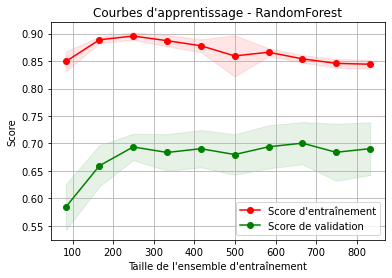

...................................
Test_score: 0.6720593349054604

MSE: 193038.90836010908
MAE: 286.82247411754133
RMSE: 439.3619332169198
mean_error: 286.82245977011496 euros 

...................................
Temps d'execution: 5.328 secondes 

-----------------------------------
----------------------------------- 

*****LinearRegresion*****



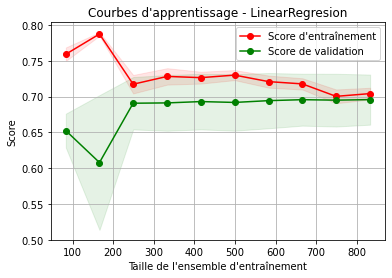

...................................
Test_score: 0.6515199710576933

MSE: 205129.1941880074
MAE: 302.1359970876242
RMSE: 452.9119055489791
mean_error: 302.1359770114942 euros 

...................................
Temps d'execution: 0.491 secondes 

-----------------------------------
----------------------------------- 

*****KNN*****



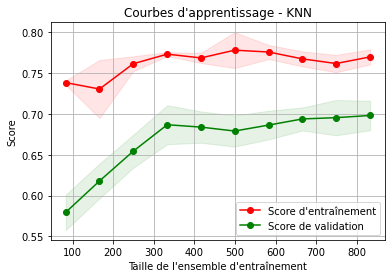

...................................
Test_score: 0.6803327179631644

MSE: 188168.86629489652
MAE: 292.79878927203066
RMSE: 433.7843545990294
mean_error: 292.79878927203066 euros 

...................................
Temps d'execution: 0.559 secondes 

-----------------------------------
----------------------------------- 

*****SVR*****



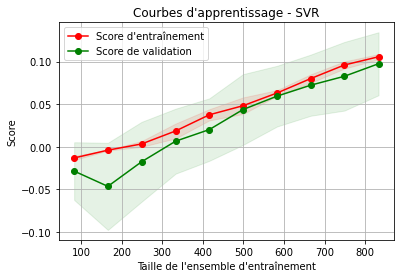

...................................
Test_score: 0.04023845252213287

MSE: 564953.7893012627
MAE: 501.6130766955916
RMSE: 751.6340793905388
mean_error: 501.61312260536397 euros 

...................................
Temps d'execution: 3.167 secondes 

-----------------------------------
----------------------------------- 



In [62]:
for name, m in dict_of_models.items():
    evaluation(m, name)

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
hyper_params_rf = {"randomforestregressor__n_estimators": [100,300,500],
                   "randomforestregressor__max_depth": [10,50,100,500],
                   "pipeline__selectkbest__k": np.arange(3,X_train.shape[1]+1,1)
                  }

In [142]:
grid = GridSearchCV(estimator = RandomForest, param_grid = hyper_params_rf, cv = 5)
grid.fit(X_train,y_train)

print(f"Best_Params: {grid.best_params_}\n")

Best_Params: {'pipeline__selectkbest__k': 50, 'randomforestregressor__max_depth': 50, 'randomforestregressor__n_estimators': 500}



*****Random_Forest_best_params*****



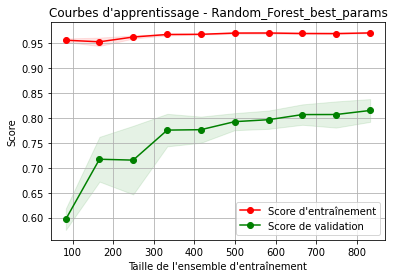

...................................
Test_score: 0.791481443416313

MSE: 122742.3092654172
MAE: 220.612477700298
RMSE: 350.3459850853399
mean_error: 220.6124712643678 euros 

...................................
Temps d'execution: 43.259 secondes 

-----------------------------------
----------------------------------- 



In [145]:
evaluation(grid.best_estimator_, 'Random_Forest_best_params')

In [146]:
final_model = grid.best_estimator_
final_pred = pd.Series(final_model.predict(X_test))

y_true = y_test
y_true.index = range(0,len(y_test))

In [147]:
Final_results = pd.DataFrame({'True': y_true,
                              'Pred': round(final_pred,2),
                              'Abs_diff.': round(abs(y_true-final_pred),2),
                              '% error': round(abs(y_true-final_pred)/y_true*100, 2)})

In [148]:
Final_results

,True,Pred,Abs_diff.,% error
0,389.00,258.11,130.89,33.65
1,2968.00,2460.98,507.02,17.08
2,1859.00,1736.63,122.37,6.58
3,612.61,591.85,20.76,3.39
4,2397.00,2053.39,343.61,14.33
...,...,...,...,...
256,825.00,887.78,62.78,7.61
257,1729.00,1438.02,290.98,16.83
258,1149.00,1430.95,281.95,24.54
259,2625.00,2531.90,93.10,3.55


In [149]:
Final_results.describe()

,True,Pred,Abs_diff.,% error
count,261.000000,261.000000,261.000000,261.000000
mean,1233.828467,1209.241073,220.612299,17.440077
std,768.702635,642.110703,272.685480,17.861423
min,199.000000,216.110000,0.050000,0.010000
25%,668.480000,687.050000,60.410000,6.710000
50%,1116.020000,1144.330000,127.970000,13.940000
75%,1598.000000,1648.180000,292.760000,24.000000
max,5499.000000,4691.990000,1960.810000,175.880000


Moyenne de 17,4% d'erreurs moyenne